In [1]:
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import mglearn
%matplotlib inline
style.use("fivethirtyeight") 

# k-Nearest Neighbors

* The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

In its simplest version, the k-NN algorithm only considers exactly one nearest neigh‐ bor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point.

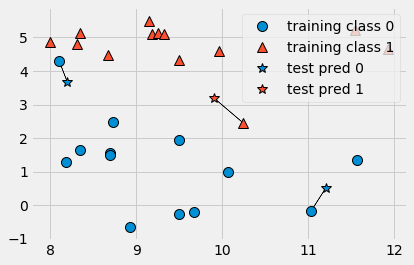

In [2]:
# Predictions made by the one-nearest-neighbor model on the forge dataset
mglearn.plots.plot_knn_classification(n_neighbors=1)

Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from. When considering more than one neighbor, we use *voting* to assign a label.  We then assign the class that is more frequent.

While this illustration is for a binary classification problem, this method can be applied to datasets with any number of classes. For more classes, we count how many neighbors belong to each class and again predict the most common class.

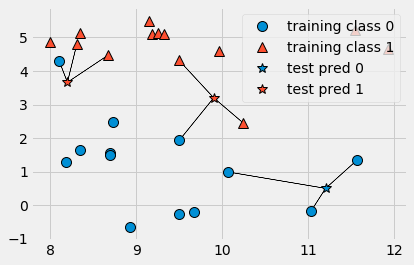

In [3]:
# Predictions made by the three-nearest-neighbors model on the forge dataset
mglearn.plots.plot_knn_classification(n_neighbors=3)

Now let’s look at how we can apply the k-nearest neighbors algorithm using scikit-learn. First, we split our data into a training and a test set so we can evaluate generalization performance.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X, y = mglearn.datasets.make_forge()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Next, we import and instantiate the class. This is when we can set parameters, like the
number of neighbors to use. Here, we set it to 3:

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classifier using the training set. For *KNeighborsClassifier* this means storing the dataset, so we can compute neighbors during prediction:


In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

To make predictions on the test data, we call the *predict* method. For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:

In [10]:
prediction = knn.predict(X_test)
prediction

array([1, 0, 1, 0, 1, 0, 0])

To evaluate how well our model generalizes, we can call the score method with the
test data together with the test labels:

In [11]:
knn.score(X_test, y_test)

0.8571428571428571

# Analyzing KNeighborsClassifier

We color the plane according to the class that would be assigned to a point in this region. This lets us view the *decision boundary*, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.

The following code produces the visualizations of the decision boundaries for one, three, and nine neighbors

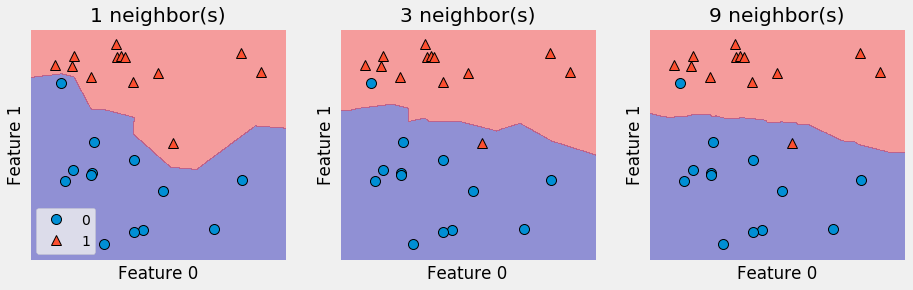

In [12]:
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
axes = [ax1, ax2, ax3]

for n, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax, eps=0.5, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

ax1.legend(loc=3)

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. *A smoother boundary corresponds to a simpler model*. In other words, *using few neighbors corresponds to high model complexity* (as shown on the right side of 'model complexity.png'), and *using many neighbors corresponds to low model complexity* (as shown on the left side of 'model complexity.png'). If you consider the extreme case where the number of neighbors is the number of all data points in the training set, each test point would have exactly the same neighbors (all training points) and all predictions would be the same: the class that is most frequent in the training set.

# The connection between model complexity and generalization

Let’s investigate whether we can confirm the connection between model complexity and generalization that we discussed earlier. We will do this on the real-world Breast Cancer dataset. 

We begin by splitting the dataset into a training and a test set. Then we evaluate training and test set performance with different numbers of neighbors.

In [13]:
from sklearn.datasets import load_breast_cancer

In [14]:
cancer = load_breast_cancer()

The *stratify* parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter *stratify*.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.



In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'] ,random_state=66)

In [16]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_setting = range(1, 11)

In [17]:
for n in neighbors_setting:
    cnn = KNeighborsClassifier(n_neighbors=n)
    clf = cnn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

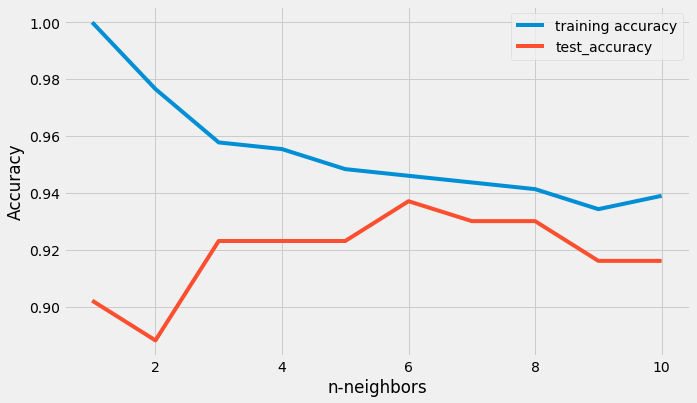

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors_setting, training_accuracy, label='training accuracy')
plt.plot(neighbors_setting, test_accuracy, label='test_accuracy')
plt.xlabel("n-neighbors")
plt.ylabel("Accuracy")
plt.legend()

The test set accuracy for using a single neighbor is lower than when using more neigh‐ bors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.